****Analysis****
1. The temperature is hotter when the city is close to the equater 
2. There is no strong correlation between Humidity, clodness, wind speed and latitudes
3. In most cities the wind speed is less than 8 m/s. 

In [1]:
%matplotlib inline

# Dependencies
#import openweathermapy.core as owm
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import numpy as np
import requests
import csv

from config import api_key
from citipy import citipy
from geopy.geocoders import Nominatim

**Randomly pick 500 cities and get their coordinates by geolocator**
1. use set() to keep unique cities
2. if geolocator can't find the respective coordinates, I remove the city

In [2]:
#select 500 unique cities based on latitude and longitude => random generating coordinates, and keep unique ones
unique_city_list = set()
city_list=[]
country_list=[]

lat_list=[]
long_list=[]

geolocator = Nominatim()

while len(unique_city_list) < 500:
    lat = np.random.uniform(-90, 90, 1)
    long = np.random.uniform(-180, 180, 1)
    city = citipy.nearest_city(lat, long)
    if city.city_name not in unique_city_list:
        unique_city_list.add(city.city_name)
        city_list.append(city.city_name)
        country_list.append(city.country_code)
        city_country=f"{city.city_name}, {city.country_code}"
        try:
            location = geolocator.geocode(city_country)
            lat_list.append(location.latitude)                 
            long_list.append(location.longitude)
        
        except Exception as e: 
            unique_city_list.pop()
            city_list.pop()
            country_list.pop()
            print(city_country,":",e)
        
    

atuona, pf : 'NoneType' object has no attribute 'latitude'
rikitea, pf : 'NoneType' object has no attribute 'latitude'
taolanaro, mg : 'NoneType' object has no attribute 'latitude'
karauzyak, uz : 'NoneType' object has no attribute 'latitude'
thano bula khan, pk : 'NoneType' object has no attribute 'latitude'
poum, nc : 'NoneType' object has no attribute 'latitude'
pidhaytsi, ua : 'NoneType' object has no attribute 'latitude'
namatanai, pg : Service timed out
cherskiy, ru : 'NoneType' object has no attribute 'latitude'
longyearbyen, sj : 'NoneType' object has no attribute 'latitude'
dzaoudzi, yt : 'NoneType' object has no attribute 'latitude'
poya, nc : 'NoneType' object has no attribute 'latitude'
pirovskoye, ru : 'NoneType' object has no attribute 'latitude'
faanui, pf : 'NoneType' object has no attribute 'latitude'
naze, jp : 'NoneType' object has no attribute 'latitude'
barentsburg, sj : 'NoneType' object has no attribute 'latitude'
afmadu, so : 'NoneType' object has no attribute '

In [ ]:
# This part is to validate geopy and citipy

# city_list=set()
# lat_list=[]
# long_list=[]
# random_lat=[]
# random_long=[]

# while len(city_list) < 10:
#     lat = np.random.uniform(-90, 90, 1)
#     long = np.random.uniform(-180, 180, 1)
#     city = citipy.nearest_city(lat, long)
#     if city.city_name not in city_list:
#         city_list.add(city.city_name)
#         country_list.append(city.country_code)
#         city_country=f"{city.city_name}, {city.country_code}"
#         random_lat.append(lat)
#         random_long.append(long)
        
#         try:
#             location = geolocator.geocode(city_country)
#             lat_list.append(location.latitude)                 
#             long_list.append(location.longitude)
        
#         except Exception as e: 
#             city_list.pop()
#             random_lat.pop()
#             random_long.pop()
#             print(city_country,":",e)

# check_df=pd.DataFrame(columns=['random_lat','random_long','lat_list','long_list','city_name'])
# check_df.lat_list=lat_list
# check_df.long_list=long_list
# check_df.random_lat=random_lat
# check_df.random_long=random_long
# check_df.city_name=city_list
        
    
    

**Use api to check weather and print city number, city name, and requested URL**
1. Mainly calling by city
2. If owm cant find the city, calling by coords -> Owm can always get weather by coords

In [3]:
#create a database including Temperature, Humidity, Cloudiness, Wind Speed
city_df=pd.DataFrame(columns=["city_name","country","temperature","humidity","cloudness","wind_speed","lat","long","city_name_owm"])
city_df.city_name=city_list
city_df.country=country_list
city_df.lat=lat_list
city_df.long=long_list


In [4]:

url = 'http://api.openweathermap.org/data/2.5/weather?'

for index, row in city_df.iterrows():
    lon_setting = row['long']
    lat_setting = row['lat']
    params1 = {"units": "metric", "APPID": api_key, "q":row['city_name']}
    params2 = {"units": "metric", "APPID": api_key, "lon":lon_setting, "lat":lat_setting}
    #print(settings)

    
    try:
        response1 = requests.get(url, params=params1)
        current_weather = response1.json()  
        temp = current_weather['main']['temp']
        humidity = current_weather["main"]['humidity']
        cloud = current_weather["clouds"]["all"]
        wind = current_weather["wind"]["speed"]
        city_name_owm=current_weather['name']

        city_df.at[index,'temperature'] = temp
        city_df.at[index,'humidity'] = humidity
        city_df.at[index,'cloudness'] = cloud
        city_df.at[index,'wind_speed'] = wind
        city_df.at[index,'city_name_owm'] = city_name_owm
        
        print(f"{index} : The weather in {current_weather['name']} is {current_weather['weather'][0]['description']}")
        print(response1.url)
    
    except Exception as e:
        response2 = requests.get(url, params=params2)
        current_weather = response2.json()  
        temp = current_weather["main"]["temp"]
        humidity = current_weather["main"]["humidity"]
        cloud = current_weather["clouds"]["all"]
        wind = current_weather["wind"]["speed"]
        city_name_owm = current_weather['name']

        city_df.at[index,'temperature'] = temp
        city_df.at[index,'humidity'] = humidity
        city_df.at[index,'cloudness'] = cloud
        city_df.at[index,'wind_speed'] = wind
        city_df.at[index,'city_name_owm'] = city_name_owm
        
        print(f"{index} : The weather at {current_weather['coord']} is {current_weather['weather'][0]['description']}")
        print(response2.url)
    


0 : The weather in Saint-Pierre is moderate rain
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=6ab6449af7cc8fcd5dc2f8da535473bb&q=saint-pierre
1 : The weather in Kamina is clear sky
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=6ab6449af7cc8fcd5dc2f8da535473bb&q=kamina
2 : The weather in Bambous Virieux is few clouds
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=6ab6449af7cc8fcd5dc2f8da535473bb&q=bambous+virieux
3 : The weather in Rio Brilhante is clear sky
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=6ab6449af7cc8fcd5dc2f8da535473bb&q=rio+brilhante
4 : The weather in Hithadhoo is broken clouds
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=6ab6449af7cc8fcd5dc2f8da535473bb&q=hithadhoo
5 : The weather in Mikuni is broken clouds
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=6ab6449af7cc8fcd5dc2f8da535473bb&q=mikuni
6 : The weather in College is clear sky
http://api.open

52 : The weather in Arlit is broken clouds
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=6ab6449af7cc8fcd5dc2f8da535473bb&q=arlit
53 : The weather in Cape Town is scattered clouds
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=6ab6449af7cc8fcd5dc2f8da535473bb&q=cape+town
54 : The weather in Jamestown is clear sky
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=6ab6449af7cc8fcd5dc2f8da535473bb&q=jamestown
55 : The weather in Lorengau is light rain
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=6ab6449af7cc8fcd5dc2f8da535473bb&q=lorengau
56 : The weather in Tabou is overcast clouds
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=6ab6449af7cc8fcd5dc2f8da535473bb&q=tabou
57 : The weather in Hilo is broken clouds
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=6ab6449af7cc8fcd5dc2f8da535473bb&q=hilo
58 : The weather in Bluff is clear sky
http://api.openweathermap.org/data/2.5/weat

105 : The weather in Narsaq is few clouds
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=6ab6449af7cc8fcd5dc2f8da535473bb&q=narsaq
106 : The weather in Qaanaaq is scattered clouds
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=6ab6449af7cc8fcd5dc2f8da535473bb&q=qaanaaq
107 : The weather in Shimoda is overcast clouds
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=6ab6449af7cc8fcd5dc2f8da535473bb&q=shimoda
108 : The weather in Sisimiut is broken clouds
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=6ab6449af7cc8fcd5dc2f8da535473bb&q=sisimiut
109 : The weather in Castro is light rain
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=6ab6449af7cc8fcd5dc2f8da535473bb&q=castro
110 : The weather in Namtsy is clear sky
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=6ab6449af7cc8fcd5dc2f8da535473bb&q=namtsy
111 : The weather at {'lon': -171.43, 'lat': -14} is clear sky
http://api.openw

157 : The weather in Codrington is few clouds
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=6ab6449af7cc8fcd5dc2f8da535473bb&q=codrington
158 : The weather in Wolfville is few clouds
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=6ab6449af7cc8fcd5dc2f8da535473bb&q=wolfville
159 : The weather in Morant Bay is few clouds
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=6ab6449af7cc8fcd5dc2f8da535473bb&q=morant+bay
160 : The weather in Dzhebariki-Khaya is clear sky
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=6ab6449af7cc8fcd5dc2f8da535473bb&q=dzhebariki-khaya
161 : The weather at {'lon': -172.33, 'lat': -13.45} is broken clouds
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=6ab6449af7cc8fcd5dc2f8da535473bb&lon=-172.3318889&lat=-13.4518478
162 : The weather in Ponta do Sol is clear sky
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=6ab6449af7cc8fcd5dc2f8da535473bb&q=ponta+do+

208 : The weather in Thompson is few clouds
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=6ab6449af7cc8fcd5dc2f8da535473bb&q=thompson
209 : The weather in Waipawa is light rain
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=6ab6449af7cc8fcd5dc2f8da535473bb&q=waipawa
210 : The weather in Nanzhang is overcast clouds
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=6ab6449af7cc8fcd5dc2f8da535473bb&q=nanzhang
211 : The weather in Wamba is few clouds
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=6ab6449af7cc8fcd5dc2f8da535473bb&q=wamba
212 : The weather in Kokopo is few clouds
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=6ab6449af7cc8fcd5dc2f8da535473bb&q=kokopo
213 : The weather in Yulara is clear sky
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=6ab6449af7cc8fcd5dc2f8da535473bb&q=yulara
214 : The weather in Xining is few clouds
http://api.openweathermap.org/data/2.5/weather

260 : The weather in Kodiak is few clouds
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=6ab6449af7cc8fcd5dc2f8da535473bb&q=kodiak
261 : The weather in Luohe is broken clouds
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=6ab6449af7cc8fcd5dc2f8da535473bb&q=luohe
262 : The weather in Kodinsk is scattered clouds
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=6ab6449af7cc8fcd5dc2f8da535473bb&q=kodinsk
263 : The weather in Honningsvag is light intensity shower rain
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=6ab6449af7cc8fcd5dc2f8da535473bb&q=honningsvag
264 : The weather in Sangueya is scattered clouds
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=6ab6449af7cc8fcd5dc2f8da535473bb&q=sangueya
265 : The weather in Kurilsk is clear sky
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=6ab6449af7cc8fcd5dc2f8da535473bb&q=kurilsk
266 : The weather in Nemuro is clear sky
http://api.o

312 : The weather in Tacna is clear sky
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=6ab6449af7cc8fcd5dc2f8da535473bb&q=tacna
313 : The weather in Chabahar is few clouds
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=6ab6449af7cc8fcd5dc2f8da535473bb&q=chabahar
314 : The weather at {'lon': 81.66, 'lat': 47.09} is clear sky
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=6ab6449af7cc8fcd5dc2f8da535473bb&lon=81.6580248&lat=47.0912103
315 : The weather at {'lon': 37.78, 'lat': 53.18} is clear sky
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=6ab6449af7cc8fcd5dc2f8da535473bb&lon=37.7767378&lat=53.1793307
316 : The weather in Kruisfontein is clear sky
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=6ab6449af7cc8fcd5dc2f8da535473bb&q=kruisfontein
317 : The weather in Hamilton is shower rain
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=6ab6449af7cc8fcd5dc2f8da535473bb&q=hamilton

363 : The weather in Paine is overcast clouds
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=6ab6449af7cc8fcd5dc2f8da535473bb&q=paine
364 : The weather in Beringovskiy is overcast clouds
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=6ab6449af7cc8fcd5dc2f8da535473bb&q=beringovskiy
365 : The weather at {'lon': -51.71, 'lat': -20.79} is clear sky
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=6ab6449af7cc8fcd5dc2f8da535473bb&lon=-51.7061247&lat=-20.7866799
366 : The weather at {'lon': 37.3, 'lat': -10.91} is broken clouds
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=6ab6449af7cc8fcd5dc2f8da535473bb&lon=37.2973201281786&lat=-10.91446
367 : The weather at {'lon': -59.96, 'lat': 45.92} is broken clouds
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=6ab6449af7cc8fcd5dc2f8da535473bb&lon=-59.9642959&lat=45.9234791
368 : The weather in Bogo is clear sky
http://api.openweathermap.org/data/2.5/weather

415 : The weather in Camacha is scattered clouds
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=6ab6449af7cc8fcd5dc2f8da535473bb&q=camacha
416 : The weather in Kondagaon is light rain
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=6ab6449af7cc8fcd5dc2f8da535473bb&q=kondagaon
417 : The weather in Ferme-Neuve is light rain
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=6ab6449af7cc8fcd5dc2f8da535473bb&q=ferme-neuve
418 : The weather in Kaeo is clear sky
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=6ab6449af7cc8fcd5dc2f8da535473bb&q=kaeo
419 : The weather in Swan Hill is scattered clouds
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=6ab6449af7cc8fcd5dc2f8da535473bb&q=swan+hill
420 : The weather at {'lon': 15.51, 'lat': 68.64} is clear sky
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=6ab6449af7cc8fcd5dc2f8da535473bb&lon=15.5129845&lat=68.6374817
421 : The weather in Corint

466 : The weather in Linkou is few clouds
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=6ab6449af7cc8fcd5dc2f8da535473bb&q=linkou
467 : The weather in Tyrma is clear sky
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=6ab6449af7cc8fcd5dc2f8da535473bb&q=tyrma
468 : The weather at {'lon': 82.46, 'lat': 65.7} is overcast clouds
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=6ab6449af7cc8fcd5dc2f8da535473bb&lon=82.458855&lat=65.704239
469 : The weather at {'lon': 27.43, 'lat': 66.72} is broken clouds
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=6ab6449af7cc8fcd5dc2f8da535473bb&lon=27.4333534&lat=66.7161179
470 : The weather in Vetluga is clear sky
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=6ab6449af7cc8fcd5dc2f8da535473bb&q=vetluga
471 : The weather in North Platte is overcast clouds
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=6ab6449af7cc8fcd5dc2f8da535473bb&q=north+p

In [5]:
city_df.head()

,city_name,country,temperature,humidity,cloudness,wind_speed,lat,long,city_name_owm
0,saint-pierre,pm,17.1,87,36,2.6,51.203307,3.211888,Saint-Pierre
1,kamina,cd,20.01,59,0,2.57,-8.735183,25.003220,Kamina
2,bambous virieux,mu,20,88,20,3.1,-20.344409,57.764533,Bambous Virieux
3,rio brilhante,br,25.81,37,0,4.52,-21.933376,-54.364459,Rio Brilhante
4,hithadhoo,mv,29.06,100,68,9.87,1.795942,73.387552,Hithadhoo


In [ ]:
# This part is to compare the results by calling coordinates and cities

# url = 'http://api.openweathermap.org/data/2.5/weather?'
# check_city_df=pd.DataFrame(columns=["city_name","country","temperature","humidity","cloudness","wind_speed","lat","long","city_name_owm"])
# check_city_df.city_name=city_list
# check_city_df.country=country_list
      
# for index, row in city_df.iterrows(): 
#     city_country=f"{row['city_name']},{row['country']}"
#     print(city_country)
   
#     params = {"units": "metric", "APPID": api_key, "q":row['city_name']}#lon":lon_setting, "lat":city_df.lat[0].round(0)}
#     try:
#         weather_test = requests.get(url, params=params).json()
        
#         temp=weather_test["main"]["temp"]
#         humidity=weather_test["main"]["humidity"]
#         cloud=weather_test["clouds"]["all"]
#         wind=weather_test["wind"]["speed"]
#         city_name_owm=weather_test['name']
        
#         check_city_df.at[index,"temperature"]=temp
#         check_city_df.at[index,"humidity"]=humidity
#         check_city_df.at[index,"cloudness"]=cloud
#         check_city_df.at[index,"wind_speed"]=wind
#         check_city_df.at[index,"city_name_owm"]=city_name_owm
#         print(f"{index} : The weather at {weather_test['coord']} is {weather_test['weather'][0]['description']}")
#     except Exception as e:
#         print(index,":",city_country)
#         print(e)




** Create plots and export to PDF **
** Export all the data to csv **

In [41]:
city_df.dtypes
city_df.temperature=pd.to_numeric(city_df.temperature)
city_df.wind_speed=pd.to_numeric(city_df.wind_speed)
city_df.cloudness=pd.to_numeric(city_df.cloudness)
city_df.humidity=pd.to_numeric(city_df.humidity)

In [70]:
#create plots
city_df.plot(kind="scatter",x="lat",y="temperature")
plt.title("Temperature vs. Latitude (05/28/2018)")
plt.xlim(-90,90)
plt.xlabel("Latitude (degree)")
plt.ylabel("Temp (C)")
plt.savefig('.\output\celcius.pdf')
plt.close()

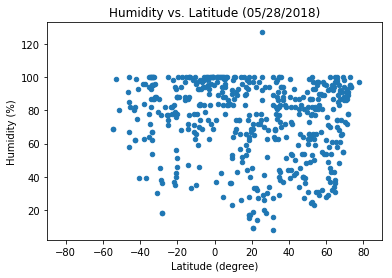

In [43]:
city_df.plot(kind="scatter",x="lat",y="humidity")
plt.title("Humidity vs. Latitude (05/28/2018)")
plt.xlim(-90,90)
plt.xlabel("Latitude (degree)")
plt.ylabel("Humidity (%)")
plt.savefig(".\output\humidity.pdf")

In [57]:
city_df.plot(kind="scatter",x="lat",y="cloudness")
plt.title("Cloudness vs. Latitude (05/28/2018)")
plt.xlim(-90,90)
plt.xlabel("Latitude (degree)")
plt.ylabel("Coudness (%)")
plt.savefig(".\output\cloudness.pdf")
plt.close()

In [58]:
wind_fig=city_df.plot(kind="scatter",x="lat",y="wind_speed")

plt.title("Wind speed vs. Latitude (05/28/2018)")
plt.xlim(-90,90)
plt.xlabel("Latitude (degree)")
plt.ylabel("Wind Speed (m/s)")
plt.savefig(".\output\wind_speed.pdf")
plt.close()

In [38]:
#output figs and the data into files
pd.DataFrame.to_csv(city_df,".\output\weather_city_data.csv",sep=',')

